In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [7]:
A = [[0.08, 1.85], [0.16,3.7], [4.59, 3.34], [0.48,11.10], [8.58,10.91], [7.33,16.75], [14.89,15.21]]
for i in A:
    # print(f'{i+1}: {2*i[0]/i[1]}')
    print(i[0]/i[1])

0.04324324324324324
0.04324324324324324
1.374251497005988
0.043243243243243246
0.7864344637946837
0.4376119402985075
0.9789612097304404


In [3]:
print(np.linalg.norm(np.array([1,-1.46]) - np.array([4,-5.84])))

5.308898190773675


In [3]:
def criar_indices(min_i, max_i, min_j, max_j):
    import itertools
    L = list(itertools.product(range(min_i, max_i), range(min_j, max_j)))
    idx_i = np.array([e[0] for e in L])
    idx_j = np.array([e[1] for e in L])
    idx = np.vstack( (idx_i, idx_j) )
    return idx

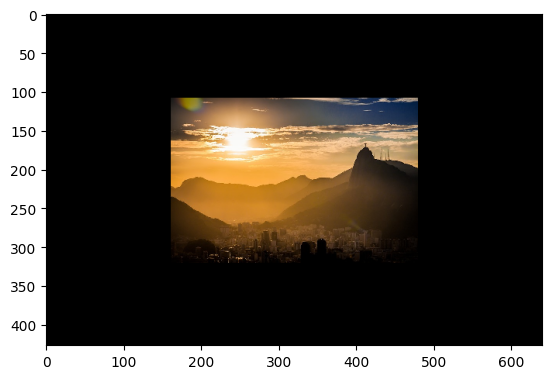

In [10]:
image = mpimg.imread("../img/rio_de_janeiro.jpg")
image_ = np.zeros_like(image)

Xd = criar_indices(0, 427, 0, 640)
Xd = np.vstack((Xd, np.ones(Xd.shape[1])))

translacao = np.array([[1,0,-(427/2)],[0,1,-320],[0,0,1]])
zoomOut = np.array([[0.5,0,0],[0,0.5,0],[0,0,1]])
translacao2 = np.array([[1,0,(427/2)],[0,1,320],[0,0,1]])
A = translacao2 @ zoomOut @ translacao
X = np.linalg.inv(A) @ Xd
Xd = Xd.astype(int)
X = X.astype(int)

filtro = (X[0,:] > 0) & (X[0,:] < image_.shape[0]) & (X[1,:] > 0) & (X[1,:] < image_.shape[1])
Xd = Xd[:,filtro]
X = X[:,filtro]

image_[Xd[0,:], Xd[1,:], :] = image[X[0,:], X[1,:], :]

plt.figure()
plt.imshow(image_)
plt.show()

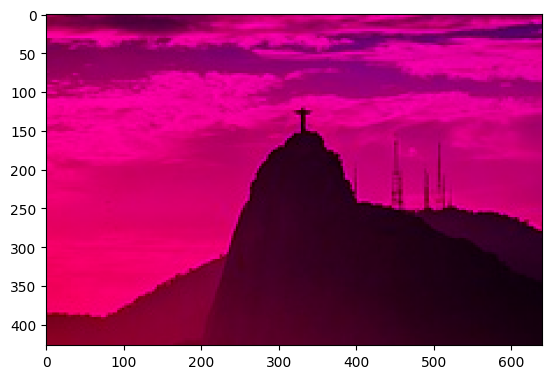

In [42]:
image = mpimg.imread("../img/rio_de_janeiro.jpg")
image_ = np.zeros_like(image)

Xd = criar_indices(0, 427, 0, 640)
Xd = np.vstack((Xd, np.ones(Xd.shape[1])))

T = np.array([[1,0,-150], [0,1,-500], [0,0,1]])
T2 = np.array([[1,0,(427/2)], [0,1,320], [0,0,1]])
Z = np.array([[3,0,0],[0,3,0],[0,0,1]])
A = T2 @ Z @ T
X = np.linalg.inv(A) @ Xd
Xd = Xd.astype(int)
X = X.astype(int)

filtro = (X[0,:] > 0) & (X[0,:] < image_.shape[0]) & (X[1,:] > 0) & (X[1,:] < image_.shape[1])
Xd = Xd[:,filtro]
X = X[:,filtro]

image_[Xd[0,:], Xd[1,:], :] = image[X[0,:], X[1,:], :]
X = image_.reshape(image.shape[0]*image.shape[1],image.shape[2]).T
Y = np.array([[1,0,0],[0,0,0],[0,0,1]]) @ X
Y = Y.T.reshape(image.shape[0],image.shape[1],image.shape[2]).astype(int)

plt.figure()
plt.imshow(Y)
plt.show()

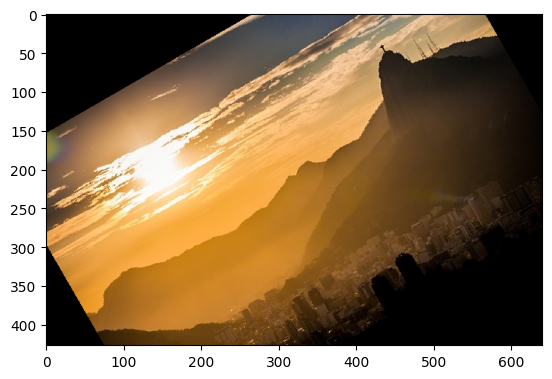

In [18]:
image = mpimg.imread("../img/rio_de_janeiro.jpg")
image_ = np.zeros_like(image)

Xd = criar_indices(0, 427, 0, 640)
Xd = np.vstack((Xd, np.ones(Xd.shape[1])))

theta = np.deg2rad(30)
T = np.array([[1,0,-(427/2)], [0,1,-320], [0,0,1]])
R = np.array([[np.cos(theta), -np.sin(theta), 0],[np.sin(theta), np.cos(theta), 0],[0,0,1]])
T2 = np.array([[1,0,(427/2)], [0,1,320], [0,0,1]])
Z = np.array([[1.5,0,0],[0,1.5,0],[0,0,1]])
A = T2 @ R @ T
X = np.linalg.inv(A) @ Xd
Xd = Xd.astype(int)
X = X.astype(int)

filtro = (X[0,:] > 0) & (X[0,:] < image_.shape[0]) & (X[1,:] > 0) & (X[1,:] < image_.shape[1])
Xd = Xd[:,filtro]
X = X[:,filtro]

image_[Xd[0,:], Xd[1,:], :] = image[X[0,:], X[1,:], :]
plt.figure()
plt.imshow(image_)
plt.show()

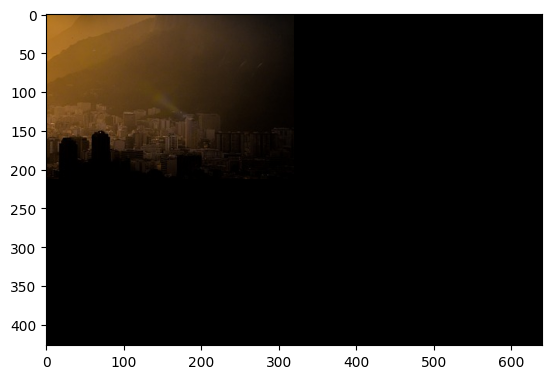

In [ ]:
image = mpimg.imread("../img/rio_de_janeiro.jpg")
image_ = np.zeros_like(image)
X = criar_indices(0, 427, 0, 640)
X = np.vstack((X, np.ones(X.shape[1])))

T = np.array([[1,0,-(427/2)], [0,1,-320], [0,0,1]])
# R = np.array([[np.cos(theta), -np.sin(theta), 0],[np.sin(theta), np.cos(theta), 0],[0,0,1]])
T2 = np.array([[1,0,427/2], [0,1,320], [0,0,1]])
Xd = T @ X
Xd = Xd.astype(int)
X = X.astype(int)

filtro = (Xd[0,:] >= 0) & (Xd[0,:] <= image_.shape[0]) & (Xd[1,:] >= 0) & (Xd[1,:] <= image_.shape[1])
Xd = Xd[:,filtro]
X = X[:,filtro]


# destino = T2 @ R @ T @ imagem
image_[Xd[0,:], Xd[1,:], :] = image[X[0,:], X[1,:], :]

plt.figure()
plt.imshow(image_)
plt.show()

In [ ]:
image = mpimg.imread("../img/rio_de_janeiro.jpg")
image_ = np.zeros_like(image)

X = criar_indices(0, image.shape[0], 0, image.shape[1])
X = np.vstack((X, np.ones(X.shape[1])))

theta = 180
T = np.array([[1,0,-(427/2)], [0,1,-320], [0,0,1]])
R = np.array([[np.cos(theta), -np.sin(theta), 0],[np.sin(theta), np.cos(theta), 0],[0,0,1]])
T2 = np.array([[1,0,427/2], [0,1,320], [0,0,1]])

A = T2 @ R @ T

In [ ]:
A = np.array([[0.125,-0.472,0.435],[0.012,-0.054,-0.345],[-0.228,-0.093,-0.106]])
alfa = A @ np.array([9,127,14]).T
alfa = np.array([[0,0,0],[0,1,0],[0,0,1]]) @ alfa
rgb = np.linalg.inv(A) @ alfa
rgb

array([38.65993023, 37.06496177, 29.10843834])

In [ ]:
#rgb to yiq
A = np.array([[0.299, 0.587, 0.144], [0.5959, -0.2746, -0.3213], [0.2115, -0.5227, 0.3112]])
rgb = np.array([140,212,2])
print(A @ rgb.T)

[166.592   24.5682 -80.58  ]


In [ ]:
A = np.array([[0.52, 0.90, 0.35, 0.57, 0.33, 0.85, 0.43, 0.81, 0.02, 0.19, 0.91], [0.18, 0.72, 0.29, 0.10, 0.22, 0.67, 0.43, 0.19, 0.35, 0.95, 0.69], [0.44, 0.49, 0.53, 0.13, 0.74, 0.71, 0.89, 0.68, 0.27, 0.09, 0.49], [0.27, 0.47, 0.41, 0.38, 0.50, 0.40, 0.95, 0.35, 0.54, 0.86, 0.46], [0.73, 0.44, 0.94, 0.53, 0.89, 0.87, 0.91, 0.57, 0.22, 0.38, 0.11], [0.81, 0.41, 0.84, 0.00, 0.98, 0.77, 0.56, 0.59, 0.47, 0.52, 0.30], [0.44, 0.72, 0.99, 0.82, 0.82, 0.42, 0.70, 0.99, 0.98, 0.32, 0.83], [0.57, 0.32, 0.32, 0.73, 0.26, 0.79, 0.54, 0.53, 0.59, 0.00, 0.50], [0.63, 0.60, 0.23, 0.42, 0.34, 0.06, 0.39, 0.15, 0.78, 0.80, 0.16], [0.11, 0.23, 0.93, 0.14, 0.96, 0.62, 0.64, 0.81, 0.12, 0.46, 0.77], [0.33, 0.82, 0.96, 0.88, 0.87, 0.48, 0.28, 0.82, 0.24, 0.77, 0.59]])
B = np.array([[0.14, 0.37, 0.44, 0.33, 0.54, 0.75, 0.47, 0.57, 0.67, 0.30, 0.82, 0.14], [0.00, 0.39, 0.80, 0.94, 0.06, 0.03, 0.10, 0.76, 0.07, 0.03, 0.52, 1.00], [0.53, 0.99, 0.67, 0.58, 0.41, 0.57, 0.02, 0.29, 0.58, 0.98, 0.67, 0.33], [0.42, 0.07, 0.60, 0.54, 0.47, 0.42, 0.34, 0.62, 0.38, 0.29, 0.66, 0.66], [0.93, 0.98, 0.94, 0.05, 0.19, 0.37, 0.93, 0.57, 0.08, 0.87, 0.90, 0.14], [0.80, 0.74, 0.41, 0.96, 0.23, 0.51, 0.52, 0.45, 0.15, 0.12, 0.05, 0.33], [0.04, 0.91, 0.29, 0.66, 0.91, 0.45, 0.79, 0.90, 0.72, 0.01, 0.12, 0.05], [0.68, 0.37, 0.46, 0.15, 0.01, 0.19, 0.77, 0.72, 0.65, 0.06, 0.35, 0.60], [0.19, 0.19, 0.15, 0.48, 0.90, 0.37, 0.24, 0.13, 0.99, 0.60, 0.93, 0.54], [0.89, 0.13, 0.76, 0.89, 0.52, 0.86, 0.04, 0.73, 0.51, 0.90, 0.83, 0.56], [0.39, 0.09, 0.09, 0.60, 0.61, 0.56, 0.12, 0.78, 0.28, 0.82, 0.39, 0.44]])
X = A@B
X

array([[2.5804, 2.6836, 2.9106, 3.4909, 2.0757, 2.4393, 2.3691, 3.8272,
        2.1925, 2.0625, 2.7109, 2.8163],
       [2.289 , 2.0666, 2.4397, 3.3524, 2.1253, 2.3495, 1.4402, 3.0238,
        1.9526, 2.3071, 2.515 , 2.3189],
       [2.4738, 3.3069, 2.7293, 2.8951, 2.2547, 2.3187, 2.7219, 3.3724,
        2.3848, 2.1273, 2.6197, 2.0145],
       [2.5231, 2.7515, 2.844 , 3.363 , 2.7895, 2.6899, 2.2235, 3.4944,
        2.7095, 2.5958, 3.0932, 2.329 ],
       [3.1936, 4.0655, 3.6721, 3.5615, 2.7208, 3.0797, 3.1052, 3.8717,
        2.9363, 2.7933, 3.5231, 2.3814],
       [3.1787, 3.7332, 3.4106, 3.2546, 2.5616, 3.0071, 2.8166, 3.5255,
        2.8537, 3.0605, 3.6201, 2.2509],
       [3.5252, 3.9013, 3.9912, 4.1469, 3.5261, 3.3836, 3.2213, 4.6011,
        3.8729, 3.7484, 4.6299, 3.6055],
       [2.1189, 2.3876, 2.2614, 2.8592, 2.3651, 2.2672, 2.2434, 2.9515,
        2.464 , 1.8281, 2.5975, 2.1679],
       [1.7909, 1.7788, 2.429 , 2.669 , 2.3183, 2.2246, 1.5129, 2.6322,
        2.3966, 2.1893, 

In [ ]:
A = np.array([[1.90, 1.20], [0.60, 1.20]])
B = np.array([[1.70, 0.60], [1.50, 0.20]])
C = np.array([[0.60, 1.90], [1.80, 0.70]])

X = C @ np.linalg.inv(A) @ np.linalg.inv(B)
X

array([[ 5.05837912, -5.91231685],
       [-1.82348901,  2.81021062]])

In [ ]:
import numpy.linalg as lin

A = np.array([[1.20, 1.60], [0.10, 1.30]])
B = np.array([[0.90, 1.90], [2.00, 1.40]])
C = np.array([[0.90, 0.70], [0.60, 0.00]])

X = C @ lin.inv(A)

In [ ]:
A = np.array([[9.3, 3.7, 4.8, 3.0, 2.2, 8.2, 1.3],
[0.8, 5.3, 2.9, 8.4, 2.7, 7.4, 6.7], 
[9.4, 1.9, 8.5, 5.1, 9.9, 5.6, 2.9], 
[7.2, 9.5, 4.0, 4.6, 7.3, 9.9, 3.5], 
[8.1, 7.6, 5.1, 5.4, 3.2, 1.4, 6.7],   
[2.8, 7.9, 4.0, 5.8, 6.9, 2.8, 4.7],
[6.6, 7.6, 6.9, 2.1, 9.9, 2.6, 7.8]])

B = np.array([[0.1], [0.3], [0.0], [3.9], [8.2], [1.7], [1.8]])
X = np.linalg.solve(A,B)
X



array([[ 2.31608298],
       [-0.59727164],
       [-4.27190073],
       [ 0.9814226 ],
       [ 1.1262633 ],
       [-0.69093946],
       [ 1.16854876]])

In [ ]:
V=[4,2,5,6,8]
for i in range(len(V)):
    for j in range(len(V)):
        if V[j]<V[i]:
            V[i], V[j] = V[j], V[i]
print(V)

[8, 6, 5, 4, 2]


In [ ]:
import numpy as np

A = np.array([[1.20, 1.60], [0.10, 1.30]])
B = np.array([[0.90, 1.90], [2.00, 1.40]])
C = np.array([[0.90, 0.70], [0.60, 0.00]])

Total = A@B@A@B@B@A@B@A
X = np.linalg.inv(Total) @ C
X

array([[-1.01515066,  4.31308157],
       [ 0.46853581, -1.9880857 ]])

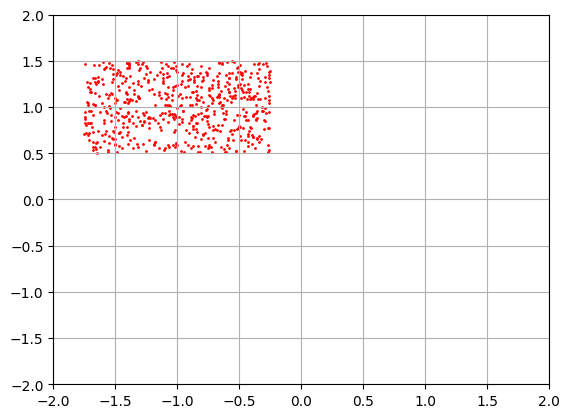

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.vstack((np.random.uniform(-0.5, 0.5, size=(2, 600)), np.ones((1,600))))
A = np.array([[1, 0, -1], [0, 1, 1], [0, 0, 1]]) # limitehorizotal, size, verticalsize, rotacao
B = np.array([[1.5,0,0],[0,1,0],[0,0,1]]) 
x = A @ B @ x
plt.figure()
plt.scatter(x[0,:], x[1,:], s=1, c='r')
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.grid()
plt.show()